In [1]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
import matplotlib.pyplot as plt

In [2]:
# Create a Spark session
spark = SparkSession.builder.appName("CustomerSegmentation").getOrCreate()

In [3]:
# Load customer data
data = spark.read.csv("customer_data.csv", header=True, inferSchema=True)

In [4]:
# Feature engineering: Combine relevant features into a single vector
feature_columns = ["TotalPurchaseAmount", "FrequencyOfPurchases", "AveragePurchaseValue"]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(data)


In [5]:
# Train a KMeans model
kmeans = KMeans(k=3, seed=42)
model = kmeans.fit(data)

In [6]:
# Make predictions
predictions = model.transform(data)

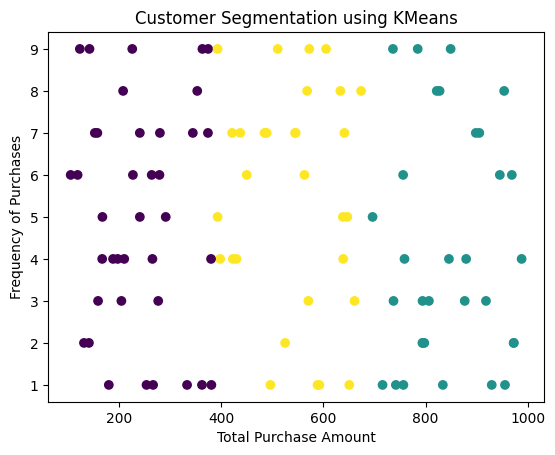

In [7]:
# Visualize the clusters (for 2D data)
result_pd = predictions.select("TotalPurchaseAmount", "FrequencyOfPurchases", "prediction").toPandas()
plt.scatter(result_pd['TotalPurchaseAmount'], result_pd['FrequencyOfPurchases'], c=result_pd['prediction'], cmap='viridis')
plt.xlabel("Total Purchase Amount")
plt.ylabel("Frequency of Purchases")
plt.title("Customer Segmentation using KMeans")
plt.show()

In [8]:
# Show the cluster centers
centers = model.clusterCenters()
print("Cluster Centers:")
for center in centers:
    print(center)

Cluster Centers:
[239.97784923   5.02631579  61.07745261]
[844.24307166   4.21875     59.74225793]
[539.37767801   5.46666667  55.93059734]
